In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

In [2]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('car photos', max_images=1)
urls[0]

Searching for 'car photos'


/Users/snehshah/anaconda3/lib/python3.11/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


'https://imagesvc.timeincapp.com/v3/foundry/image/?q=60&url=https://s3.amazonaws.com/the-drive-staging/message-editor%2F1528475104876-1-bmwi8.jpg'

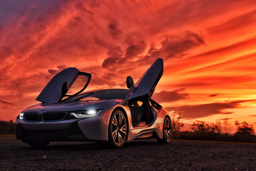

In [4]:
dest = 'car.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'train photos'


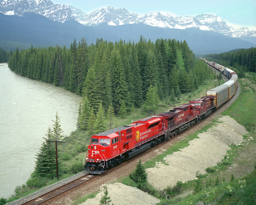

In [5]:
download_url(search_images('train photos', max_images=1)[0], 'train.jpg', show_progress=False)
Image.open('train.jpg').to_thumb(256,256)

In [13]:
searches = 'train','car'
path = Path('car_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} truck photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} bicycle photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'train photo'
Searching for 'train truck photo'
Searching for 'train bicycle photo'
Searching for 'car photo'
Searching for 'car truck photo'
Searching for 'car bicycle photo'


In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

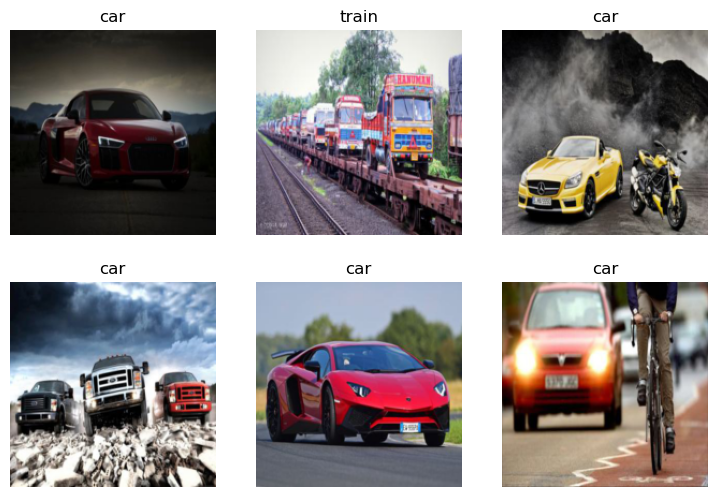

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.076844,0.166186,0.060606,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.336675,0.054084,0.000000,00:01
1,0.199556,0.020037,0.000000,00:01
2,0.136874,0.014586,0.000000,00:01


In [17]:
is_car,_,probs = learn.predict(PILImage.create('car.jpg'))
print(f"This is a: {is_car}.")
print(f"Probability it's a car: {probs[0]:.4f}")

This is a: car.
Probability it's a car: 0.9952
